In [1]:
!pip install mediapipe

     |████████████████████████████████| 32.8 MB 1.5 MB/s 


In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d sorokin/faceforensics
!unzip faceforensics.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/manipulated_sequences/Deepfakes/c23/videos/000_003.mp4  
  inflating: /content/manipulated_sequences/Deepfakes/c23/videos/001_870.mp4  
  inflating: /content/manipulated_sequences/Deepfakes/c23/videos/002_006.mp4  
  inflating: /content/manipulated_sequences/Deepfakes/c23/videos/003_000.mp4  
  inflating: /content/manipulated_sequences/Deepfakes/c23/videos/004_982.mp4  
  inflating: /content/manipulated_sequences/Deepfakes/c23/videos/005_010.mp4  
  inflating: /content/manipulated_sequences/Deepfakes/c23/videos/006_002.mp4  
  inflating: /content/manipulated_sequences/Deepfakes/c23/videos/007_132.mp4  
  inflating: /content/manipulated_sequences/Deepfakes/c23/videos/008_990.mp4  
  inflating: /content/manipulated_sequences/Deepfakes/c23/videos/009_027.mp4  
  inflating: /content/manipulated_sequences/Deepfakes/c23/videos/010_005.mp4  
  inflating: /content/manipulated_sequences/Deepfakes/c23/videos/011_805.mp4  
 

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import cv2
import tqdm
import os
import numpy as np
import math
import mediapipe as mp

In [6]:
a=[]
d=1
class VideoProcess():
    
    
    def getFrame(self, file_list, file_num="all", frame_num=5, type=0):
        
        
        
        if len(file_list) == 0 : return None
        
        if file_num == 'all' :
            file_list = file_list[:]
        elif len(file_list) > file_num:
            file_list = file_list[:file_num]
        else:
            file_list = file_list[:]
            
        
        frame_num = 5
        pic_num = len(file_list)
        img_arr = [[] for i in range(pic_num)]
        for (index1,file) in enumerate(file_list):
            # filename = os.path.join(videos_dir, file)
            # print(file)
            cap=cv2.VideoCapture(file.decode("utf-8") )
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if frame_count <= 0 : continue
            
            # type : linspace
            if type == 0:
                frame_idxs = np.linspace(0, frame_count - 1, frame_num, endpoint=True, dtype=np.int)
                frame_idxs = np.unique(frame_idxs)

            for (index2,idx) in enumerate(frame_idxs):
                cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
                ret, frame  = cap.read()
                resized = cv2.resize(frame, (128,128), interpolation = cv2.INTER_AREA)
                img_arr[index1].append(resized)
            
        return img_arr

#     def blazeFace(self, imgs):

#         mp_face_detection = mp.solutions.face_detection
#         net = mp_face_detection.FaceDetection()

#         # Optionally change the thresholds:
#         net.min_score_thresh = 0.75
#         net.min_suppression_threshold = 0.3
#         pic_num = 2#5len(imgs)

#         if pic_num == 0: return None

#         frame_num = 5#len(imgs)

#         res = [[] for i in range(pic_num)]
#         for i in range(pic_num):
#             for j in range(frame_num):
#                 img = imgs[i][j]
#                 detections = net.process(cv2.resize(img,(128,128))).detections
#                 a.append((detections))
#                 if detections == None : continue
#                 res[i].append(self.findFace(img, detections))
#         return res     

#     def findFace(self, img, detections):
# #         print("detections nums", len(detections))
#         i = 0
#         box = detections.location_data.relative_bounding_box
#         ymin = math.floor(box.ymin * img.shape[0])
#         xmin = math.floor(box.xmin* img.shape[1])
#         ymax = math.ceil(box.height * img.shape[0])
#         xmax = math.ceil(box.width * img.shape[1])
# #         print(detections[i, 0], detections[i, 1],detections[i, 2], detections[i, 3])
# #         print(img.shape)v
# #         print(xmin, xmax, ymin, ymax)
#         face = img[ymin:ymax, xmin:xmax+1]
# #         print(face.shape)

#         return face

    
        

In [7]:

# # os.listdir('/content/original_sequences/youtube/c23/videos/000.mp4')
# video_process = VideoProcess()
# img = video_process.getFrame(
#     (list(train_dataset.as_numpy_iterator()))[0][0][:]
    
    
#     , file_num=500, frame_num=5, type=0)


In [8]:
# len(img[31])

In [9]:
# video_process = VideoProcess()
# videos_dir = "/content/original_sequences/youtube/c23/videos"
# deepfake_dir = "/content/manipulated_sequences/Deepfakes/c23/videos"


# imgs = video_process.getFrame(videos_dir, file_num=500, frame_num=5, type=0)
# # print("GetFrame Over!")
# # res = video_process.blazeFace(imgs)
# print("Blaze Over!")

In [10]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from os.path import isfile, join
from os import rename, listdir, rename, makedirs
from shutil import copyfile

In [11]:
df = {
    'path':[],
    'label':[]
}
source_folder_1 = '/content/original_sequences/youtube/c23/videos'
source_folder_2 = '/content/manipulated_sequences/Deepfakes/c23/videos'
source_folder_3 = '/content/manipulated_sequences/Face2Face/c23/videos'
source_folder_4 = '/content/manipulated_sequences/FaceSwap/c23/videos'
source_folder_5 = '/content/manipulated_sequences/NeuralTextures/c23/videos'

In [12]:
for i in listdir(source_folder_1):
  df['path'].append(join(source_folder_1,i))
  df['label'].append(0)
for i in listdir(source_folder_2):
  df['path'].append(join(source_folder_2,i))
  df['label'].append(1)
for i in listdir(source_folder_3):
  df['path'].append(join(source_folder_3,i))
  df['label'].append(2)
for i in listdir(source_folder_4):
  df['path'].append(join(source_folder_4,i))
  df['label'].append(3)  
for i in listdir(source_folder_5):
  df['path'].append(join(source_folder_5,i))
  df['label'].append(4)


In [13]:
 df =pd.DataFrame(df)
 

In [14]:
df

,path,label
0,/content/original_sequences/youtube/c23/videos...,0
1,/content/original_sequences/youtube/c23/videos...,0
2,/content/original_sequences/youtube/c23/videos...,0
3,/content/original_sequences/youtube/c23/videos...,0
4,/content/original_sequences/youtube/c23/videos...,0
...,...,...
4995,/content/manipulated_sequences/NeuralTextures/...,4
4996,/content/manipulated_sequences/NeuralTextures/...,4
4997,/content/manipulated_sequences/NeuralTextures/...,4
4998,/content/manipulated_sequences/NeuralTextures/...,4


In [15]:

def get_dataset_partitions_pd(df, train_split=0.8, val_split=0.1, test_split=0.1):
    assert (train_split + test_split + val_split) == 1
    
    # Only allows for equal validation and test splits
    assert val_split == test_split 

    # Specify seed to always have the same split distribution between runs
    df_sample = df.sample(frac=1, random_state=12)
    indices_or_sections = [int(train_split * len(df)), int((1 - val_split - test_split) * len(df))]
    
    train_ds, val_ds, test_ds = np.split(df_sample, indices_or_sections)
    
    return train_ds, val_ds, test_ds

In [25]:
train_ds, val_ds, test_ds=get_dataset_partitions_pd(df[:1000])

In [26]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_ds['path'],train_ds['label']))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(16)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((val_ds['path'],val_ds['label']))
val_dataset = val_dataset.batch(16)

In [27]:
def sub_model():
  base = tf.keras.applications.xception.Xception(include_top=False,weights='imagenet',input_shape=(128,128,3))
  inputs = tf.keras.Input(shape=(128,128,3))
  scale_layer = tf.keras.layers.Rescaling(scale=1. / 255.)
  x = scale_layer(inputs)
  
  x = base(x)
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Dense(512, activation="relu", kernel_initializer="he_uniform")(x)
  x = tf.keras.layers.Dropout(0.4)(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  predictions = tf.keras.layers.Dense(5,activation="softmax",kernel_initializer="he_uniform")(x)
  model = tf.keras.Model(inputs=inputs, outputs=predictions)

  for layer in base.layers:
      layer.trainable = True

  optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-06)

  model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"])
  return model

  
    

In [28]:
from tensorflow.keras.layers import TimeDistributed, GRU, Dense, Dropout
def build_model(shape=(5, 128, 128, 3), nbout=5):
    # Create our convnet with (112, 112, 3) input shape
    convnet = sub_model()
    
    # then create our final model
    model = tf.keras.Sequential()
    # add the convnet with (5, 112, 112, 3) shape
    model.add(TimeDistributed(convnet, input_shape=shape))
    # here, you can also use GRU or LSTM
    model.add(GRU(64))
    # and finally, we make a decision network
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(nbout, activation='softmax'))
    return model

In [29]:
tf.keras.backend.clear_session()

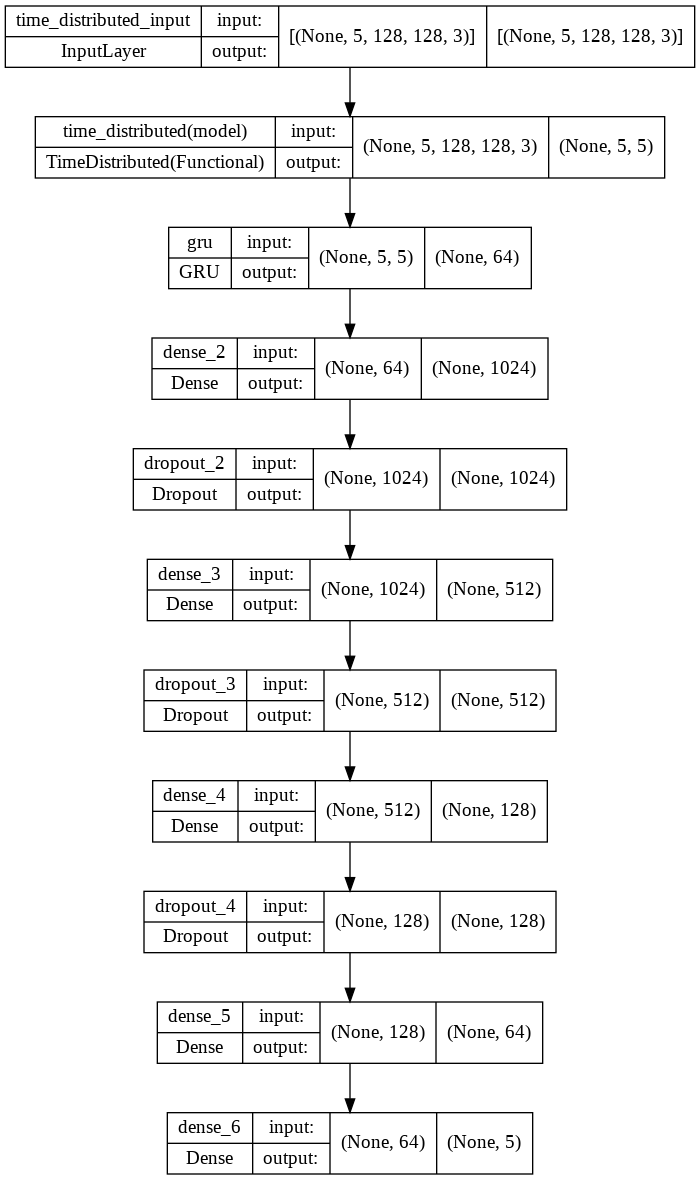

In [30]:
from keras.utils.vis_utils import plot_model
model = build_model()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [22]:

# train_loss_results = []
# train_accuracy_results = []

# num_epochs = 201

# for epoch in range(num_epochs):
#   epoch_loss_avg = tf.keras.metrics.Mean()
#   epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

#   # Training loop - using batches of 32
#   for x, y in ds_train_batch:
#     # Optimize the model
#     loss_value, grads = grad(model, x, y)
#     optimizer.apply_gradients(zip(grads, model.trainable_variables))

#     # Track progress
#     epoch_loss_avg.update_state(loss_value)  # Add current batch loss
#     # Compare predicted label to actual label
#     # training=True is needed only if there are layers with different
#     # behavior during training versus inference (e.g. Dropout).
#     epoch_accuracy.update_state(y, model(x, training=True))

#   # End epoch
#   train_loss_results.append(epoch_loss_avg.result())
#   train_accuracy_results.append(epoch_accuracy.result())

#   if epoch % 50 == 0:
#     print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
#                                                                 epoch_loss_avg.result(),
#                                                                 epoch_accuracy.result()))

In [31]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-06)


In [34]:
epochs = 6
video_process = VideoProcess()
val_loss_results = []
val_accuracy_results = []
train_loss_results = []
train_accuracy_results = []
for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    print("\nStart of epoch %d" % (epoch))
    val_loss_avg = tf.keras.metrics.Mean()
    val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in tqdm.tqdm(enumerate(train_dataset.as_numpy_iterator())):

        
        imgs = video_process.getFrame(x_batch_train, file_num=500, frame_num=5, type=0);

        # res = video_process.blazeFace(imgs)
        print("Step is over"  )

        with tf.GradientTape() as tape:

            
            logits = model([np.array(imgs)], training=True)  

            # Compute the loss value for this minibatch.
            loss_value = loss_object(y_batch_train,logits)


        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        epoch_loss_avg.update_state(loss_value)  # Add current batch loss



    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
        epoch_accuracy.update_state(y_batch_train, model([np.array(imgs)], training=True))

          

        # Log every 200 batches.
        if step % 1 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * 16))
        
      # End epoch


    for step, (x_batch_val, y_batch_val) in tqdm.tqdm(enumerate(val_dataset.as_numpy_iterator())):
        val_logits = model(x_batch_val, training=False)
        # Update val metrics
        val_acc_metric.update_state(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))
    # print("Time taken: %.2fs" % (time.time() - start_time))

    # for step, (x_batch_val, y_batch_val) in tqdm.tqdm(enumerate(val_dataset.as_numpy_iterator())):
    #     val_logits = model(x_batch_val, training=False)
    #     val_loss_value = loss_object(y_batch_val,val_logits)
    #     val_loss_avg.update_state(val_loss_value)
    #     # Update val metrics
    #     val_acc_metric.update_state(y_batch_val, val_logits)
    # val_acc = val_acc_metric.result()
    # val_loss =  val_loss_avg.result()

    # print("Validation acc: %.4f" % (float(val_acc),))
    # print("Validation loss: %.4f" % (float(val_loss),))
    # # print("Time taken: %.2fs" % (time.time() - start_time))
    val_loss_results.append(val_loss_avg.result())
    val_accuracy_results.append(val_acc_metric.result())
    # val_acc_metric.reset_states()
    # val_loss_avg.reset_states()
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
      


Start of epoch 0


0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Step is over


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
1it [01:32, 92.86s/it]

Training loss (for one batch) at step 0: 1.6385
Seen so far: 16 samples
Step is over


2it [02:48, 82.87s/it]

Training loss (for one batch) at step 1: 1.5914
Seen so far: 32 samples
Step is over


3it [04:10, 82.51s/it]

Training loss (for one batch) at step 2: 1.5514
Seen so far: 48 samples
Step is over


4it [05:48, 88.34s/it]

Training loss (for one batch) at step 3: 1.4878
Seen so far: 64 samples
Step is over


5it [07:10, 86.24s/it]

Training loss (for one batch) at step 4: 1.4208
Seen so far: 80 samples
Step is over


6it [08:44, 88.71s/it]

Training loss (for one batch) at step 5: 1.2705
Seen so far: 96 samples
Step is over


7it [10:13, 88.87s/it]

Training loss (for one batch) at step 6: 1.1020
Seen so far: 112 samples
Step is over


8it [11:38, 87.77s/it]

Training loss (for one batch) at step 7: 0.8685
Seen so far: 128 samples
Step is over


9it [13:11, 89.38s/it]

Training loss (for one batch) at step 8: 0.6313
Seen so far: 144 samples
Step is over


10it [14:41, 89.42s/it]

Training loss (for one batch) at step 9: 0.3773
Seen so far: 160 samples
Step is over


11it [16:06, 88.29s/it]

Training loss (for one batch) at step 10: 0.1661
Seen so far: 176 samples
Step is over


12it [17:41, 90.17s/it]

Training loss (for one batch) at step 11: 0.0940
Seen so far: 192 samples
Step is over


13it [19:29, 95.71s/it]

Training loss (for one batch) at step 12: 0.0222
Seen so far: 208 samples
Step is over


14it [21:06, 95.87s/it]

Training loss (for one batch) at step 13: 0.0078
Seen so far: 224 samples
Step is over


15it [22:36, 94.33s/it]

Training loss (for one batch) at step 14: 0.0010
Seen so far: 240 samples
Step is over


16it [24:10, 94.09s/it]

Training loss (for one batch) at step 15: 0.0020
Seen so far: 256 samples
Step is over


17it [25:38, 92.42s/it]

Training loss (for one batch) at step 16: 0.0001
Seen so far: 272 samples
Step is over


18it [27:09, 91.98s/it]

Training loss (for one batch) at step 17: 0.0000
Seen so far: 288 samples
Step is over


19it [28:46, 93.36s/it]

Training loss (for one batch) at step 18: 0.0000
Seen so far: 304 samples
Step is over


20it [30:21, 93.91s/it]

Training loss (for one batch) at step 19: 0.0000
Seen so far: 320 samples
Step is over


21it [31:48, 91.92s/it]

Training loss (for one batch) at step 20: 0.0000
Seen so far: 336 samples
Step is over


22it [33:10, 88.79s/it]

Training loss (for one batch) at step 21: 0.0000
Seen so far: 352 samples
Step is over


23it [34:47, 91.20s/it]

Training loss (for one batch) at step 22: 0.0000
Seen so far: 368 samples
Step is over


24it [36:09, 88.43s/it]

Training loss (for one batch) at step 23: 0.0000
Seen so far: 384 samples
Step is over


25it [37:48, 91.83s/it]

Training loss (for one batch) at step 24: 0.0000
Seen so far: 400 samples
Step is over


26it [39:52, 101.37s/it]

Training loss (for one batch) at step 25: 0.0000
Seen so far: 416 samples
Step is over


27it [41:13, 95.13s/it] 

Training loss (for one batch) at step 26: 0.0000
Seen so far: 432 samples
Step is over


28it [42:39, 92.37s/it]

Training loss (for one batch) at step 27: 0.0000
Seen so far: 448 samples
Step is over


29it [44:09, 91.78s/it]

Training loss (for one batch) at step 28: 0.0000
Seen so far: 464 samples
Step is over


30it [45:36, 90.36s/it]

Training loss (for one batch) at step 29: 0.0000
Seen so far: 480 samples
Step is over


31it [47:05, 90.05s/it]

Training loss (for one batch) at step 30: 0.0000
Seen so far: 496 samples
Step is over


32it [48:41, 91.59s/it]

Training loss (for one batch) at step 31: 0.0000
Seen so far: 512 samples
Step is over


33it [50:13, 91.97s/it]

Training loss (for one batch) at step 32: 0.0000
Seen so far: 528 samples
Step is over


34it [51:46, 92.21s/it]

Training loss (for one batch) at step 33: 0.0000
Seen so far: 544 samples
Step is over


35it [53:08, 89.02s/it]

Training loss (for one batch) at step 34: 0.0000
Seen so far: 560 samples
Step is over


36it [54:43, 90.88s/it]

Training loss (for one batch) at step 35: 0.0000
Seen so far: 576 samples
Step is over


37it [56:12, 90.31s/it]

Training loss (for one batch) at step 36: 0.0000
Seen so far: 592 samples
Step is over


38it [57:29, 86.26s/it]

Training loss (for one batch) at step 37: 0.0000
Seen so far: 608 samples
Step is over


39it [59:04, 88.87s/it]

Training loss (for one batch) at step 38: 0.0000
Seen so far: 624 samples
Step is over


40it [1:00:39, 90.71s/it]

Training loss (for one batch) at step 39: 0.0000
Seen so far: 640 samples
Step is over


41it [1:02:20, 93.85s/it]

Training loss (for one batch) at step 40: 0.0000
Seen so far: 656 samples
Step is over


42it [1:03:52, 93.37s/it]

Training loss (for one batch) at step 41: 0.0000
Seen so far: 672 samples
Step is over


43it [1:05:15, 90.08s/it]

Training loss (for one batch) at step 42: 0.0000
Seen so far: 688 samples
Step is over


44it [1:06:49, 91.30s/it]

Training loss (for one batch) at step 43: 0.0000
Seen so far: 704 samples
Step is over


45it [1:08:05, 86.84s/it]

Training loss (for one batch) at step 44: 0.0000
Seen so far: 720 samples
Step is over


46it [1:09:46, 90.96s/it]

Training loss (for one batch) at step 45: 0.0000
Seen so far: 736 samples
Step is over


47it [1:11:30, 95.11s/it]

Training loss (for one batch) at step 46: 0.0000
Seen so far: 752 samples
Step is over


48it [1:12:54, 91.65s/it]

Training loss (for one batch) at step 47: 0.0000
Seen so far: 768 samples
Step is over


49it [1:14:28, 92.20s/it]

Training loss (for one batch) at step 48: 0.0000
Seen so far: 784 samples
Step is over


50it [1:16:03, 91.26s/it]


Training loss (for one batch) at step 49: 0.0000
Seen so far: 800 samples


0it [00:00, ?it/s]


Validation acc: 0.0000

Start of epoch 1


0it [00:00, ?it/s]

Step is over


1it [01:42, 102.37s/it]

Training loss (for one batch) at step 0: 0.0000
Seen so far: 16 samples
Step is over


2it [03:17, 98.02s/it] 

Training loss (for one batch) at step 1: 0.0000
Seen so far: 32 samples
Step is over


3it [04:59, 99.90s/it]

Training loss (for one batch) at step 2: 0.0000
Seen so far: 48 samples
Step is over


4it [06:36, 98.84s/it]

Training loss (for one batch) at step 3: 0.0000
Seen so far: 64 samples
Step is over


5it [08:22, 101.30s/it]

Training loss (for one batch) at step 4: 0.0000
Seen so far: 80 samples
Step is over


6it [09:54, 98.20s/it] 

Training loss (for one batch) at step 5: 0.0000
Seen so far: 96 samples
Step is over


7it [11:17, 93.24s/it]

Training loss (for one batch) at step 6: 0.0000
Seen so far: 112 samples
Step is over


8it [12:53, 94.01s/it]

Training loss (for one batch) at step 7: 0.0000
Seen so far: 128 samples
Step is over


9it [14:36, 96.81s/it]

Training loss (for one batch) at step 8: 0.0000
Seen so far: 144 samples
Step is over


10it [16:07, 95.12s/it]

Training loss (for one batch) at step 9: 0.0000
Seen so far: 160 samples
Step is over


11it [17:41, 94.79s/it]

Training loss (for one batch) at step 10: 0.0000
Seen so far: 176 samples
Step is over


12it [19:06, 91.73s/it]

Training loss (for one batch) at step 11: 0.0000
Seen so far: 192 samples
Step is over


13it [20:38, 91.80s/it]

Training loss (for one batch) at step 12: 0.0000
Seen so far: 208 samples
Step is over


14it [22:04, 90.14s/it]

Training loss (for one batch) at step 13: 0.0000
Seen so far: 224 samples
Step is over


15it [23:26, 87.67s/it]

Training loss (for one batch) at step 14: 0.0000
Seen so far: 240 samples
Step is over


16it [25:31, 98.79s/it]

Training loss (for one batch) at step 15: 0.0000
Seen so far: 256 samples
Step is over


17it [27:23, 102.94s/it]

Training loss (for one batch) at step 16: 0.0000
Seen so far: 272 samples
Step is over


18it [28:57, 100.11s/it]

Training loss (for one batch) at step 17: 0.0000
Seen so far: 288 samples
Step is over


19it [30:20, 95.19s/it] 

Training loss (for one batch) at step 18: 0.0000
Seen so far: 304 samples
Step is over


20it [32:02, 97.08s/it]

Training loss (for one batch) at step 19: 0.0000
Seen so far: 320 samples
Step is over


21it [33:35, 95.79s/it]

Training loss (for one batch) at step 20: 0.0000
Seen so far: 336 samples
Step is over


22it [35:19, 98.43s/it]

Training loss (for one batch) at step 21: 0.0000
Seen so far: 352 samples
Step is over


23it [36:54, 97.41s/it]

Training loss (for one batch) at step 22: 0.0000
Seen so far: 368 samples
Step is over


24it [38:19, 93.65s/it]

Training loss (for one batch) at step 23: 0.0000
Seen so far: 384 samples
Step is over


25it [39:57, 94.91s/it]

Training loss (for one batch) at step 24: 0.0000
Seen so far: 400 samples
Step is over


26it [41:42, 97.89s/it]

Training loss (for one batch) at step 25: 0.0000
Seen so far: 416 samples
Step is over


27it [43:06, 93.62s/it]

Training loss (for one batch) at step 26: 0.0000
Seen so far: 432 samples
Step is over


28it [44:55, 98.25s/it]

Training loss (for one batch) at step 27: 0.0000
Seen so far: 448 samples
Step is over


29it [46:33, 98.26s/it]

Training loss (for one batch) at step 28: 0.0000
Seen so far: 464 samples
Step is over


30it [48:01, 95.23s/it]

Training loss (for one batch) at step 29: 0.0000
Seen so far: 480 samples
Step is over


31it [49:46, 98.13s/it]

Training loss (for one batch) at step 30: 0.0000
Seen so far: 496 samples
Step is over


32it [51:33, 100.66s/it]

Training loss (for one batch) at step 31: 0.0000
Seen so far: 512 samples
Step is over


33it [53:01, 96.85s/it] 

Training loss (for one batch) at step 32: 0.0000
Seen so far: 528 samples
Step is over


34it [54:32, 95.26s/it]

Training loss (for one batch) at step 33: 0.0000
Seen so far: 544 samples
Step is over


35it [56:01, 93.42s/it]

Training loss (for one batch) at step 34: 0.0000
Seen so far: 560 samples
Step is over


36it [57:35, 93.65s/it]

Training loss (for one batch) at step 35: 0.0000
Seen so far: 576 samples
Step is over


37it [59:15, 95.31s/it]

Training loss (for one batch) at step 36: 0.0000
Seen so far: 592 samples
Step is over


38it [1:00:46, 94.11s/it]

Training loss (for one batch) at step 37: 0.0000
Seen so far: 608 samples
Step is over


39it [1:02:12, 91.59s/it]

Training loss (for one batch) at step 38: 0.0000
Seen so far: 624 samples
Step is over


40it [1:03:38, 90.13s/it]

Training loss (for one batch) at step 39: 0.0000
Seen so far: 640 samples
Step is over


41it [1:05:33, 97.54s/it]

Training loss (for one batch) at step 40: 0.0000
Seen so far: 656 samples
Step is over


42it [1:07:17, 99.47s/it]

Training loss (for one batch) at step 41: 0.0000
Seen so far: 672 samples
Step is over


43it [1:08:43, 95.34s/it]

Training loss (for one batch) at step 42: 0.0000
Seen so far: 688 samples
Step is over


44it [1:10:15, 94.44s/it]

Training loss (for one batch) at step 43: 0.0000
Seen so far: 704 samples
Step is over


45it [1:11:58, 96.99s/it]

Training loss (for one batch) at step 44: 0.0000
Seen so far: 720 samples
Step is over


46it [1:13:37, 97.70s/it]

Training loss (for one batch) at step 45: 0.0000
Seen so far: 736 samples
Step is over


47it [1:15:20, 99.27s/it]

Training loss (for one batch) at step 46: 0.0000
Seen so far: 752 samples
Step is over


48it [1:16:46, 95.26s/it]

Training loss (for one batch) at step 47: 0.0000
Seen so far: 768 samples
Step is over


49it [1:18:11, 92.14s/it]

Training loss (for one batch) at step 48: 0.0000
Seen so far: 784 samples
Step is over


50it [1:19:35, 95.52s/it]

Training loss (for one batch) at step 49: 0.0000
Seen so far: 800 samples



0it [00:00, ?it/s]


Validation acc: 0.0000

Start of epoch 2


0it [00:00, ?it/s]

Step is over


1it [01:30, 90.86s/it]

Training loss (for one batch) at step 0: 0.0000
Seen so far: 16 samples
Step is over


2it [03:03, 91.86s/it]

Training loss (for one batch) at step 1: 0.0000
Seen so far: 32 samples
Step is over


3it [04:50, 98.73s/it]

Training loss (for one batch) at step 2: 0.0000
Seen so far: 48 samples
Step is over


4it [06:29, 98.85s/it]

Training loss (for one batch) at step 3: 0.0000
Seen so far: 64 samples
Step is over


5it [08:10, 99.52s/it]

Training loss (for one batch) at step 4: 0.0000
Seen so far: 80 samples
Step is over


6it [09:50, 99.95s/it]

Training loss (for one batch) at step 5: 0.0000
Seen so far: 96 samples
Step is over


7it [11:29, 99.46s/it]

Training loss (for one batch) at step 6: 0.0000
Seen so far: 112 samples
Step is over


8it [12:56, 95.61s/it]

Training loss (for one batch) at step 7: 0.0000
Seen so far: 128 samples
Step is over


9it [14:12, 89.57s/it]

Training loss (for one batch) at step 8: 0.0000
Seen so far: 144 samples
Step is over


10it [15:47, 91.20s/it]

Training loss (for one batch) at step 9: 0.0000
Seen so far: 160 samples
Step is over


11it [17:17, 90.73s/it]

Training loss (for one batch) at step 10: 0.0000
Seen so far: 176 samples
Step is over


12it [18:53, 92.23s/it]

Training loss (for one batch) at step 11: 0.0000
Seen so far: 192 samples
Step is over


13it [20:19, 90.46s/it]

Training loss (for one batch) at step 12: 0.0000
Seen so far: 208 samples
Step is over


14it [21:29, 84.42s/it]

Training loss (for one batch) at step 13: 0.0000
Seen so far: 224 samples
Step is over


15it [22:57, 85.25s/it]

Training loss (for one batch) at step 14: 0.0000
Seen so far: 240 samples
Step is over


16it [24:23, 85.57s/it]

Training loss (for one batch) at step 15: 0.0000
Seen so far: 256 samples
Step is over


17it [25:53, 86.97s/it]

Training loss (for one batch) at step 16: 0.0000
Seen so far: 272 samples
Step is over


18it [27:19, 86.52s/it]

Training loss (for one batch) at step 17: 0.0000
Seen so far: 288 samples
Step is over


19it [28:46, 86.83s/it]

Training loss (for one batch) at step 18: 0.0000
Seen so far: 304 samples
Step is over


20it [30:05, 84.52s/it]

Training loss (for one batch) at step 19: 0.0000
Seen so far: 320 samples
Step is over


21it [31:39, 87.34s/it]

Training loss (for one batch) at step 20: 0.0000
Seen so far: 336 samples
Step is over


22it [33:02, 85.95s/it]

Training loss (for one batch) at step 21: 0.0000
Seen so far: 352 samples
Step is over


23it [34:21, 83.79s/it]

Training loss (for one batch) at step 22: 0.0000
Seen so far: 368 samples
Step is over


24it [35:48, 84.87s/it]

Training loss (for one batch) at step 23: 0.0000
Seen so far: 384 samples
Step is over


25it [37:39, 92.66s/it]

Training loss (for one batch) at step 24: 0.0000
Seen so far: 400 samples
Step is over


26it [39:01, 89.61s/it]

Training loss (for one batch) at step 25: 0.0000
Seen so far: 416 samples
Step is over


27it [40:24, 87.42s/it]

Training loss (for one batch) at step 26: 0.0000
Seen so far: 432 samples
Step is over


28it [41:58, 89.56s/it]

Training loss (for one batch) at step 27: 0.0000
Seen so far: 448 samples
Step is over


29it [43:28, 89.67s/it]

Training loss (for one batch) at step 28: 0.0000
Seen so far: 464 samples
Step is over


30it [44:47, 86.30s/it]

Training loss (for one batch) at step 29: 0.0000
Seen so far: 480 samples
Step is over


31it [46:12, 86.09s/it]

Training loss (for one batch) at step 30: 0.0000
Seen so far: 496 samples
Step is over


32it [47:44, 87.79s/it]

Training loss (for one batch) at step 31: 0.0000
Seen so far: 512 samples
Step is over


33it [49:06, 86.09s/it]

Training loss (for one batch) at step 32: 0.0000
Seen so far: 528 samples
Step is over


34it [50:39, 88.05s/it]

Training loss (for one batch) at step 33: 0.0000
Seen so far: 544 samples
Step is over


35it [52:12, 89.71s/it]

Training loss (for one batch) at step 34: 0.0000
Seen so far: 560 samples
Step is over


36it [53:34, 87.28s/it]

Training loss (for one batch) at step 35: 0.0000
Seen so far: 576 samples
Step is over


37it [55:12, 90.61s/it]

Training loss (for one batch) at step 36: 0.0000
Seen so far: 592 samples
Step is over


38it [56:41, 89.93s/it]

Training loss (for one batch) at step 37: 0.0000
Seen so far: 608 samples
Step is over


39it [58:10, 89.74s/it]

Training loss (for one batch) at step 38: 0.0000
Seen so far: 624 samples
Step is over


40it [59:46, 91.72s/it]

Training loss (for one batch) at step 39: 0.0000
Seen so far: 640 samples
Step is over


41it [1:01:22, 92.95s/it]

Training loss (for one batch) at step 40: 0.0000
Seen so far: 656 samples
Step is over


42it [1:02:55, 92.93s/it]

Training loss (for one batch) at step 41: 0.0000
Seen so far: 672 samples
Step is over


43it [1:04:13, 88.43s/it]

Training loss (for one batch) at step 42: 0.0000
Seen so far: 688 samples
Step is over


44it [1:05:33, 85.85s/it]

Training loss (for one batch) at step 43: 0.0000
Seen so far: 704 samples
Step is over


45it [1:07:02, 86.95s/it]

Training loss (for one batch) at step 44: 0.0000
Seen so far: 720 samples
Step is over


46it [1:08:28, 86.42s/it]

Training loss (for one batch) at step 45: 0.0000
Seen so far: 736 samples
Step is over


47it [1:09:54, 86.48s/it]

Training loss (for one batch) at step 46: 0.0000
Seen so far: 752 samples
Step is over


48it [1:11:20, 86.44s/it]

Training loss (for one batch) at step 47: 0.0000
Seen so far: 768 samples
Step is over


49it [1:12:41, 84.52s/it]

Training loss (for one batch) at step 48: 0.0000
Seen so far: 784 samples
Step is over


50it [1:14:18, 89.18s/it]


Training loss (for one batch) at step 49: 0.0000
Seen so far: 800 samples


0it [00:00, ?it/s]


Validation acc: 0.0000

Start of epoch 3


0it [00:00, ?it/s]

Step is over


1it [01:20, 80.45s/it]

Training loss (for one batch) at step 0: 0.0000
Seen so far: 16 samples
Step is over


2it [02:51, 86.40s/it]

Training loss (for one batch) at step 1: 0.0000
Seen so far: 32 samples
Step is over


3it [04:12, 84.33s/it]

Training loss (for one batch) at step 2: 0.0000
Seen so far: 48 samples
Step is over


4it [05:40, 85.80s/it]

Training loss (for one batch) at step 3: 0.0000
Seen so far: 64 samples
Step is over


5it [07:12, 88.05s/it]

Training loss (for one batch) at step 4: 0.0000
Seen so far: 80 samples
Step is over


6it [08:45, 89.60s/it]

Training loss (for one batch) at step 5: 0.0000
Seen so far: 96 samples
Step is over


7it [10:17, 90.30s/it]

Training loss (for one batch) at step 6: 0.0000
Seen so far: 112 samples
Step is over


8it [11:37, 87.08s/it]

Training loss (for one batch) at step 7: 0.0000
Seen so far: 128 samples
Step is over


9it [13:12, 89.64s/it]

Training loss (for one batch) at step 8: 0.0000
Seen so far: 144 samples
Step is over


10it [14:31, 86.25s/it]

Training loss (for one batch) at step 9: 0.0000
Seen so far: 160 samples
Step is over


11it [15:50, 83.97s/it]

Training loss (for one batch) at step 10: 0.0000
Seen so far: 176 samples
Step is over


12it [17:25, 87.54s/it]

Training loss (for one batch) at step 11: 0.0000
Seen so far: 192 samples
Step is over


13it [18:50, 86.77s/it]

Training loss (for one batch) at step 12: 0.0000
Seen so far: 208 samples
Step is over


14it [20:26, 89.54s/it]

Training loss (for one batch) at step 13: 0.0000
Seen so far: 224 samples
Step is over


15it [22:01, 91.18s/it]

Training loss (for one batch) at step 14: 0.0000
Seen so far: 240 samples
Step is over


16it [23:43, 94.23s/it]

Training loss (for one batch) at step 15: 0.0000
Seen so far: 256 samples
Step is over


17it [25:00, 89.12s/it]

Training loss (for one batch) at step 16: 0.0000
Seen so far: 272 samples
Step is over


18it [26:34, 90.50s/it]

Training loss (for one batch) at step 17: 0.0000
Seen so far: 288 samples
Step is over


19it [28:14, 93.36s/it]

Training loss (for one batch) at step 18: 0.0000
Seen so far: 304 samples
Step is over


20it [29:42, 91.76s/it]

Training loss (for one batch) at step 19: 0.0000
Seen so far: 320 samples
Step is over


21it [30:59, 87.41s/it]

Training loss (for one batch) at step 20: 0.0000
Seen so far: 336 samples
Step is over


22it [32:32, 89.21s/it]

Training loss (for one batch) at step 21: 0.0000
Seen so far: 352 samples
Step is over


23it [33:54, 87.06s/it]

Training loss (for one batch) at step 22: 0.0000
Seen so far: 368 samples
Step is over


24it [35:23, 87.46s/it]

Training loss (for one batch) at step 23: 0.0000
Seen so far: 384 samples
Step is over


25it [36:57, 89.35s/it]

Training loss (for one batch) at step 24: 0.0000
Seen so far: 400 samples
Step is over


26it [38:23, 88.36s/it]

Training loss (for one batch) at step 25: 0.0000
Seen so far: 416 samples
Step is over


27it [39:53, 89.00s/it]

Training loss (for one batch) at step 26: 0.0000
Seen so far: 432 samples
Step is over


28it [41:17, 87.55s/it]

Training loss (for one batch) at step 27: 0.0000
Seen so far: 448 samples
Step is over


29it [42:40, 86.11s/it]

Training loss (for one batch) at step 28: 0.0000
Seen so far: 464 samples
Step is over


30it [44:18, 89.82s/it]

Training loss (for one batch) at step 29: 0.0000
Seen so far: 480 samples
Step is over


31it [45:48, 89.84s/it]

Training loss (for one batch) at step 30: 0.0000
Seen so far: 496 samples
Step is over


32it [47:31, 93.65s/it]

Training loss (for one batch) at step 31: 0.0000
Seen so far: 512 samples
Step is over


33it [48:53, 90.34s/it]

Training loss (for one batch) at step 32: 0.0000
Seen so far: 528 samples
Step is over


34it [50:12, 86.70s/it]

Training loss (for one batch) at step 33: 0.0000
Seen so far: 544 samples
Step is over


35it [51:42, 87.87s/it]

Training loss (for one batch) at step 34: 0.0000
Seen so far: 560 samples
Step is over


36it [53:16, 89.63s/it]

Training loss (for one batch) at step 35: 0.0000
Seen so far: 576 samples
Step is over


37it [54:41, 88.13s/it]

Training loss (for one batch) at step 36: 0.0000
Seen so far: 592 samples
Step is over


38it [56:18, 90.82s/it]

Training loss (for one batch) at step 37: 0.0000
Seen so far: 608 samples
Step is over


39it [57:46, 90.00s/it]

Training loss (for one batch) at step 38: 0.0000
Seen so far: 624 samples
Step is over


40it [59:13, 89.26s/it]

Training loss (for one batch) at step 39: 0.0000
Seen so far: 640 samples
Step is over


41it [1:00:30, 85.47s/it]

Training loss (for one batch) at step 40: 0.0000
Seen so far: 656 samples
Step is over


42it [1:01:57, 85.83s/it]

Training loss (for one batch) at step 41: 0.0000
Seen so far: 672 samples
Step is over


43it [1:03:31, 88.40s/it]

Training loss (for one batch) at step 42: 0.0000
Seen so far: 688 samples
Step is over


44it [1:05:09, 91.14s/it]

Training loss (for one batch) at step 43: 0.0000
Seen so far: 704 samples
Step is over


45it [1:06:45, 92.81s/it]

Training loss (for one batch) at step 44: 0.0000
Seen so far: 720 samples
Step is over


46it [1:08:05, 88.91s/it]

Training loss (for one batch) at step 45: 0.0000
Seen so far: 736 samples
Step is over


47it [1:09:24, 85.79s/it]

Training loss (for one batch) at step 46: 0.0000
Seen so far: 752 samples
Step is over


48it [1:10:50, 86.08s/it]

Training loss (for one batch) at step 47: 0.0000
Seen so far: 768 samples
Step is over


49it [1:12:28, 89.56s/it]

Training loss (for one batch) at step 48: 0.0000
Seen so far: 784 samples
Step is over


50it [1:14:03, 88.88s/it]

Training loss (for one batch) at step 49: 0.0000
Seen so far: 800 samples



0it [00:00, ?it/s]


Validation acc: 0.0000

Start of epoch 4


0it [00:00, ?it/s]

Step is over


1it [01:35, 95.35s/it]

Training loss (for one batch) at step 0: 0.0000
Seen so far: 16 samples
Step is over


2it [02:54, 85.60s/it]

Training loss (for one batch) at step 1: 0.0000
Seen so far: 32 samples
Step is over


3it [04:25, 88.31s/it]

Training loss (for one batch) at step 2: 0.0000
Seen so far: 48 samples
Step is over


4it [05:56, 89.21s/it]

Training loss (for one batch) at step 3: 0.0000
Seen so far: 64 samples
Step is over


5it [07:24, 88.92s/it]

Training loss (for one batch) at step 4: 0.0000
Seen so far: 80 samples
Step is over


6it [08:53, 88.98s/it]

Training loss (for one batch) at step 5: 0.0000
Seen so far: 96 samples
Step is over


7it [10:35, 93.09s/it]

Training loss (for one batch) at step 6: 0.0000
Seen so far: 112 samples
Step is over


8it [11:59, 90.16s/it]

Training loss (for one batch) at step 7: 0.0000
Seen so far: 128 samples
Step is over


9it [13:27, 89.64s/it]

Training loss (for one batch) at step 8: 0.0000
Seen so far: 144 samples
Step is over


10it [15:04, 91.90s/it]

Training loss (for one batch) at step 9: 0.0000
Seen so far: 160 samples
Step is over


11it [16:34, 91.18s/it]

Training loss (for one batch) at step 10: 0.0000
Seen so far: 176 samples
Step is over


12it [18:06, 91.39s/it]

Training loss (for one batch) at step 11: 0.0000
Seen so far: 192 samples
Step is over


13it [19:38, 91.61s/it]

Training loss (for one batch) at step 12: 0.0000
Seen so far: 208 samples
Step is over


14it [20:58, 88.26s/it]

Training loss (for one batch) at step 13: 0.0000
Seen so far: 224 samples
Step is over


15it [22:37, 91.50s/it]

Training loss (for one batch) at step 14: 0.0000
Seen so far: 240 samples
Step is over


16it [24:02, 89.44s/it]

Training loss (for one batch) at step 15: 0.0000
Seen so far: 256 samples
Step is over


17it [25:24, 87.23s/it]

Training loss (for one batch) at step 16: 0.0000
Seen so far: 272 samples
Step is over


18it [26:50, 86.93s/it]

Training loss (for one batch) at step 17: 0.0000
Seen so far: 288 samples
Step is over


19it [28:39, 93.43s/it]

Training loss (for one batch) at step 18: 0.0000
Seen so far: 304 samples
Step is over


20it [30:27, 97.74s/it]

Training loss (for one batch) at step 19: 0.0000
Seen so far: 320 samples
Step is over


21it [31:45, 91.82s/it]

Training loss (for one batch) at step 20: 0.0000
Seen so far: 336 samples
Step is over


22it [33:00, 86.78s/it]

Training loss (for one batch) at step 21: 0.0000
Seen so far: 352 samples
Step is over


23it [34:23, 85.75s/it]

Training loss (for one batch) at step 22: 0.0000
Seen so far: 368 samples
Step is over


24it [35:49, 85.82s/it]

Training loss (for one batch) at step 23: 0.0000
Seen so far: 384 samples
Step is over


25it [37:21, 87.73s/it]

Training loss (for one batch) at step 24: 0.0000
Seen so far: 400 samples
Step is over


26it [39:12, 94.76s/it]

Training loss (for one batch) at step 25: 0.0000
Seen so far: 416 samples
Step is over


27it [40:36, 91.58s/it]

Training loss (for one batch) at step 26: 0.0000
Seen so far: 432 samples
Step is over


28it [41:47, 85.30s/it]

Training loss (for one batch) at step 27: 0.0000
Seen so far: 448 samples
Step is over


29it [43:10, 84.49s/it]

Training loss (for one batch) at step 28: 0.0000
Seen so far: 464 samples
Step is over


30it [44:31, 83.61s/it]

Training loss (for one batch) at step 29: 0.0000
Seen so far: 480 samples
Step is over


31it [45:59, 84.72s/it]

Training loss (for one batch) at step 30: 0.0000
Seen so far: 496 samples
Step is over


32it [47:20, 83.75s/it]

Training loss (for one batch) at step 31: 0.0000
Seen so far: 512 samples
Step is over


33it [48:43, 83.56s/it]

Training loss (for one batch) at step 32: 0.0000
Seen so far: 528 samples
Step is over


34it [50:16, 86.21s/it]

Training loss (for one batch) at step 33: 0.0000
Seen so far: 544 samples
Step is over


35it [51:52, 89.24s/it]

Training loss (for one batch) at step 34: 0.0000
Seen so far: 560 samples
Step is over


36it [53:14, 87.23s/it]

Training loss (for one batch) at step 35: 0.0000
Seen so far: 576 samples
Step is over


37it [54:41, 87.19s/it]

Training loss (for one batch) at step 36: 0.0000
Seen so far: 592 samples
Step is over


38it [56:00, 84.56s/it]

Training loss (for one batch) at step 37: 0.0000
Seen so far: 608 samples
Step is over


39it [57:32, 86.82s/it]

Training loss (for one batch) at step 38: 0.0000
Seen so far: 624 samples
Step is over


40it [59:14, 91.44s/it]

Training loss (for one batch) at step 39: 0.0000
Seen so far: 640 samples
Step is over


41it [1:00:53, 93.69s/it]

Training loss (for one batch) at step 40: 0.0000
Seen so far: 656 samples
Step is over


42it [1:02:22, 92.23s/it]

Training loss (for one batch) at step 41: 0.0000
Seen so far: 672 samples
Step is over


43it [1:03:45, 89.55s/it]

Training loss (for one batch) at step 42: 0.0000
Seen so far: 688 samples
Step is over


44it [1:05:00, 85.19s/it]

Training loss (for one batch) at step 43: 0.0000
Seen so far: 704 samples
Step is over


45it [1:06:36, 88.32s/it]

Training loss (for one batch) at step 44: 0.0000
Seen so far: 720 samples
Step is over


46it [1:07:51, 84.30s/it]

Training loss (for one batch) at step 45: 0.0000
Seen so far: 736 samples
Step is over


47it [1:09:21, 86.01s/it]

Training loss (for one batch) at step 46: 0.0000
Seen so far: 752 samples
Step is over


48it [1:10:47, 85.96s/it]

Training loss (for one batch) at step 47: 0.0000
Seen so far: 768 samples
Step is over


49it [1:12:18, 87.63s/it]

Training loss (for one batch) at step 48: 0.0000
Seen so far: 784 samples
Step is over


50it [1:13:41, 88.42s/it]


Training loss (for one batch) at step 49: 0.0000
Seen so far: 800 samples


0it [00:00, ?it/s]


Validation acc: 0.0000

Start of epoch 5


0it [00:00, ?it/s]

Step is over


1it [01:27, 87.77s/it]

Training loss (for one batch) at step 0: 0.0000
Seen so far: 16 samples
Step is over


2it [02:54, 87.26s/it]

Training loss (for one batch) at step 1: 0.0000
Seen so far: 32 samples
Step is over


3it [04:08, 81.16s/it]

Training loss (for one batch) at step 2: 0.0000
Seen so far: 48 samples
Step is over


4it [05:27, 80.13s/it]

Training loss (for one batch) at step 3: 0.0000
Seen so far: 64 samples
Step is over


5it [07:06, 87.06s/it]

Training loss (for one batch) at step 4: 0.0000
Seen so far: 80 samples
Step is over


6it [08:41, 89.69s/it]

Training loss (for one batch) at step 5: 0.0000
Seen so far: 96 samples
Step is over


7it [10:04, 87.44s/it]

Training loss (for one batch) at step 6: 0.0000
Seen so far: 112 samples
Step is over


8it [11:25, 85.57s/it]

Training loss (for one batch) at step 7: 0.0000
Seen so far: 128 samples
Step is over


9it [12:50, 85.23s/it]

Training loss (for one batch) at step 8: 0.0000
Seen so far: 144 samples
Step is over


10it [14:17, 85.77s/it]

Training loss (for one batch) at step 9: 0.0000
Seen so far: 160 samples
Step is over


11it [15:39, 84.88s/it]

Training loss (for one batch) at step 10: 0.0000
Seen so far: 176 samples
Step is over


12it [17:07, 85.78s/it]

Training loss (for one batch) at step 11: 0.0000
Seen so far: 192 samples
Step is over


13it [18:50, 90.97s/it]

Training loss (for one batch) at step 12: 0.0000
Seen so far: 208 samples
Step is over


14it [20:18, 90.00s/it]

Training loss (for one batch) at step 13: 0.0000
Seen so far: 224 samples
Step is over


15it [21:37, 86.55s/it]

Training loss (for one batch) at step 14: 0.0000
Seen so far: 240 samples
Step is over


16it [22:57, 84.85s/it]

Training loss (for one batch) at step 15: 0.0000
Seen so far: 256 samples
Step is over


17it [24:24, 85.40s/it]

Training loss (for one batch) at step 16: 0.0000
Seen so far: 272 samples
Step is over


18it [25:59, 88.20s/it]

Training loss (for one batch) at step 17: 0.0000
Seen so far: 288 samples
Step is over


19it [27:32, 89.70s/it]

Training loss (for one batch) at step 18: 0.0000
Seen so far: 304 samples
Step is over


20it [28:55, 87.70s/it]

Training loss (for one batch) at step 19: 0.0000
Seen so far: 320 samples
Step is over


21it [30:23, 87.88s/it]

Training loss (for one batch) at step 20: 0.0000
Seen so far: 336 samples
Step is over


22it [31:49, 87.30s/it]

Training loss (for one batch) at step 21: 0.0000
Seen so far: 352 samples
Step is over


23it [33:23, 89.20s/it]

Training loss (for one batch) at step 22: 0.0000
Seen so far: 368 samples
Step is over


24it [34:53, 89.56s/it]

Training loss (for one batch) at step 23: 0.0000
Seen so far: 384 samples
Step is over


25it [36:27, 90.78s/it]

Training loss (for one batch) at step 24: 0.0000
Seen so far: 400 samples
Step is over


26it [38:06, 93.18s/it]

Training loss (for one batch) at step 25: 0.0000
Seen so far: 416 samples
Step is over


27it [39:27, 89.50s/it]

Training loss (for one batch) at step 26: 0.0000
Seen so far: 432 samples
Step is over


28it [40:48, 87.05s/it]

Training loss (for one batch) at step 27: 0.0000
Seen so far: 448 samples
Step is over


29it [42:10, 85.43s/it]

Training loss (for one batch) at step 28: 0.0000
Seen so far: 464 samples
Step is over


30it [43:38, 86.40s/it]

Training loss (for one batch) at step 29: 0.0000
Seen so far: 480 samples
Step is over


31it [45:03, 85.98s/it]

Training loss (for one batch) at step 30: 0.0000
Seen so far: 496 samples
Step is over


32it [47:00, 95.11s/it]

Training loss (for one batch) at step 31: 0.0000
Seen so far: 512 samples
Step is over


33it [48:26, 92.44s/it]

Training loss (for one batch) at step 32: 0.0000
Seen so far: 528 samples
Step is over


34it [50:17, 97.94s/it]

Training loss (for one batch) at step 33: 0.0000
Seen so far: 544 samples
Step is over


35it [51:37, 92.49s/it]

Training loss (for one batch) at step 34: 0.0000
Seen so far: 560 samples
Step is over


36it [53:08, 92.23s/it]

Training loss (for one batch) at step 35: 0.0000
Seen so far: 576 samples
Step is over


37it [54:31, 89.51s/it]

Training loss (for one batch) at step 36: 0.0000
Seen so far: 592 samples
Step is over


38it [56:14, 93.54s/it]

Training loss (for one batch) at step 37: 0.0000
Seen so far: 608 samples
Step is over


39it [57:52, 94.72s/it]

Training loss (for one batch) at step 38: 0.0000
Seen so far: 624 samples
Step is over


40it [59:30, 95.85s/it]

Training loss (for one batch) at step 39: 0.0000
Seen so far: 640 samples
Step is over


41it [1:00:55, 92.64s/it]

Training loss (for one batch) at step 40: 0.0000
Seen so far: 656 samples
Step is over


42it [1:02:38, 95.77s/it]

Training loss (for one batch) at step 41: 0.0000
Seen so far: 672 samples
Step is over


43it [1:04:00, 91.66s/it]

Training loss (for one batch) at step 42: 0.0000
Seen so far: 688 samples
Step is over


44it [1:05:25, 89.63s/it]

Training loss (for one batch) at step 43: 0.0000
Seen so far: 704 samples
Step is over


45it [1:06:46, 86.78s/it]

Training loss (for one batch) at step 44: 0.0000
Seen so far: 720 samples
Step is over


46it [1:08:26, 91.03s/it]

Training loss (for one batch) at step 45: 0.0000
Seen so far: 736 samples
Step is over


47it [1:09:50, 88.89s/it]

Training loss (for one batch) at step 46: 0.0000
Seen so far: 752 samples
Step is over


48it [1:11:18, 88.48s/it]

Training loss (for one batch) at step 47: 0.0000
Seen so far: 768 samples
Step is over


49it [1:12:53, 90.41s/it]

Training loss (for one batch) at step 48: 0.0000
Seen so far: 784 samples
Step is over


50it [1:14:26, 89.33s/it]

Training loss (for one batch) at step 49: 0.0000
Seen so far: 800 samples



0it [00:00, ?it/s]

Validation acc: 0.0000


In [35]:
import matplotlib.pyplot as plt

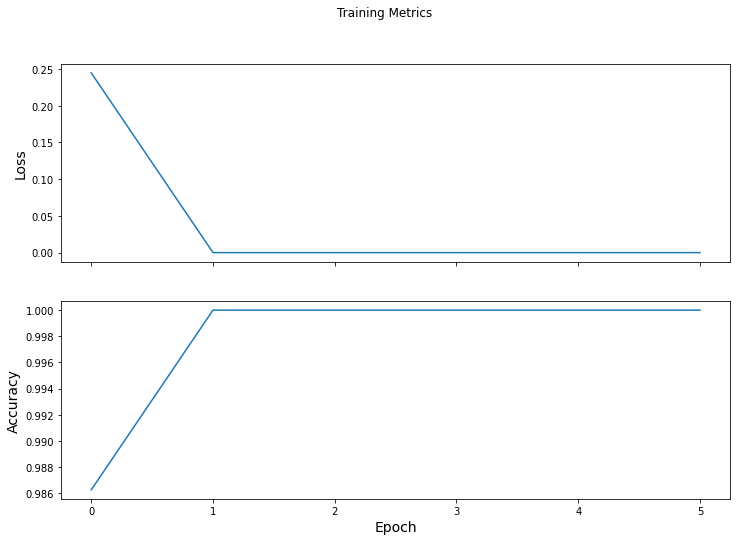

In [36]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)
# axes[0].plot(val_loss_results)


axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
# axes[0].plot(val_accuracy_results)
plt.show()

In [43]:
video_process = VideoProcess()
imgs = video_process.getFrame([b"/content/manipulated_sequences/Face2Face/c23/videos/001_870.mp4"])
logits = model([np.array(imgs)]) 
print(logits)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


tf.Tensor([[1.0000000e+00 3.0334343e-30 1.5150440e-28 0.0000000e+00 4.3863114e-38]], shape=(1, 5), dtype=float32)


In [46]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x, y = make_classification(random_state=0)

clf = SVC(random_state=0)
clf.fit(x_batch_train, y_batch_train)

plot_confusion_matrix(clf, x_batch_val, y_batch_val)  
plt.show()

ValueError: ignored